In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix, issparse
from scipy.sparse.linalg import norm as spnorm
import pickle
import sklearn
from scipy import sparse
from ntf_cython.random import algo42, algo44, admm, rel_error
from savvy_factorize.compression import algo41, algo43, algo45, algo46, structured_compression, count_gauss
from sklearn.decomposition.nmf import _initialize_nmf
from savvy_factorize.structured_nmf import structured_randomized_bppnmf
from numpy.linalg import norm, solve
from ntf_cython.nmf import nmf

%matplotlib inline

## Using Randomly Generated Synthetic Data

In [7]:
m = 10000
n = 1000
np.random.seed(0)
A = np.abs(np.random.randn(m, n))
r = 400

# COMPRESSED NMF WITH ALGO 42

In [3]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, algo='algo42', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

CPU times: user 13min 43s, sys: 1min 18s, total: 15min 1s
Wall time: 8min 7s


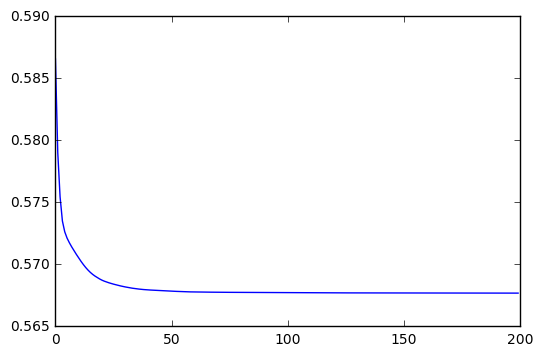

In [6]:
plt.plot(relative_error)

In [7]:
rel_error(A, U.dot(V))

0.56768719976384019

# COMPRESSED BPP WITH ALGO 41

In [11]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, algo='algo41', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1935 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1940 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1945 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1950 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1955 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5

CPU times: user 1h 4min 36s, sys: 1min 59s, total: 1h 6min 35s
Wall time: 34min 20s


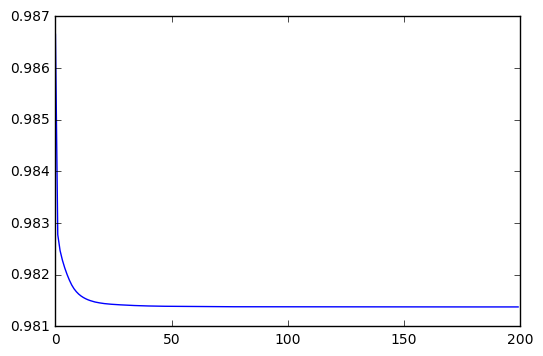

In [12]:
plt.plot(relative_error)

# COMPRESSED BPP WITH QR

In [13]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

CPU times: user 13min 27s, sys: 1min 18s, total: 14min 46s
Wall time: 7min 47s


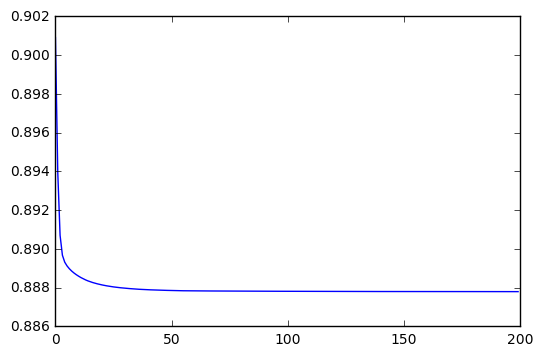

In [14]:
plt.plot(relative_error)

# COMPRESSED BPP WITH ALGO43

In [15]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, algo='algo43', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1890 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1895 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1900 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1905 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1910 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5

CPU times: user 1h 15min 36s, sys: 2min 33s, total: 1h 18min 9s
Wall time: 16h 49min 49s


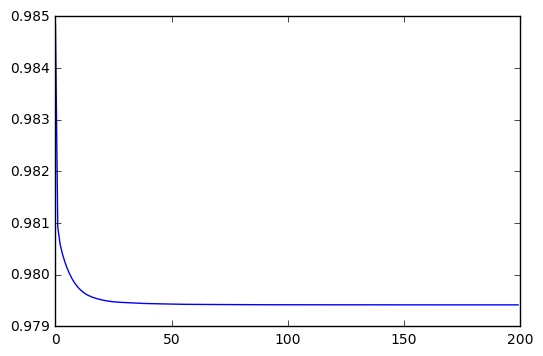

In [16]:
plt.plot(relative_error)

## COMPRESSED BPP WITH ALGO44

In [17]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, algo='algo44', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1935 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1940 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1945 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1950 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1955 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5

CPU times: user 1h 24min 31s, sys: 2min 37s, total: 1h 27min 8s
Wall time: 47min 58s


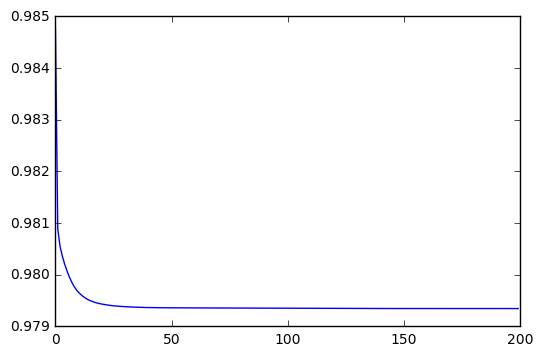

In [18]:
plt.plot(relative_error)

## COMPRESSED BPP WITH STRUCTURED COMPRESSION

In [20]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, algo='structured_compression', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 1995 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 2000 reached. Increase it to improve convergence.
  ConvergenceWarning)


CPU times: user 11min 35s, sys: 46.8 s, total: 12min 22s
Wall time: 6min 37s


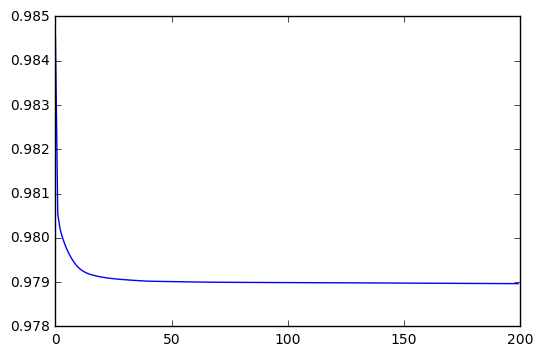

In [21]:
plt.plot(relative_error)

## COMPRESSED BPP WITH COUNT GAUSSIAN

In [22]:
%%time
U, V, relative_error = structured_randomized_bppnmf(A, algo='count_gauss', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

CPU times: user 12min 25s, sys: 54.5 s, total: 13min 19s
Wall time: 8min 48s


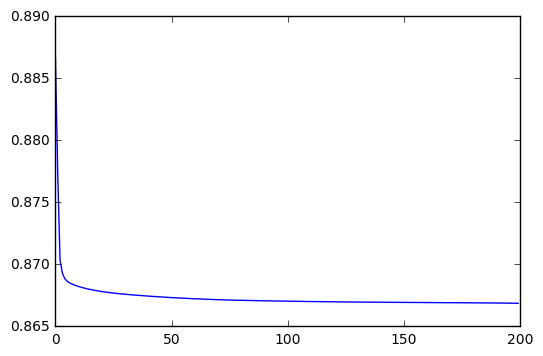

In [23]:
plt.plot(relative_error)

# UNCOMPRESSED BPP IMPLEMENTATION

In [8]:
%time W, H, _, _ = nmf(A, n_components=r, max_iter=200, random_state=2)

CPU times: user 1h 41min 1s, sys: 4min 24s, total: 1h 45min 26s
Wall time: 58min 39s


In [9]:
rel_error(A, W.dot(H))

0.4547736894583318

## Applying the Method to CMS Dataset

In [2]:
%%time
df = pd.read_csv('/Users/user/Documents/Medicare_Provider_Util_Payment_PUF_CY2013/Medicare_Provider_Util_Payment_PUF_CY2013.txt', sep= '\t')

<string>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 50.8 s, sys: 9.54 s, total: 1min
Wall time: 1min 2s


In [3]:
#Clean up first row of the data
df = df[1:]
np.shape(df)

(9287876, 28)

In [4]:
%%time
row_name = 'NPI'
col_name = 'HCPCS_CODE'
measure = 'AVERAGE_SUBMITTED_CHRG_AMT'
# filters: averages are calculated by NPI, HCPCS_CODE and PLACE_OF_SERVICE
# so need to fix PLACE_OF_SERVICE to not be forced to average averages.
# The rest of the filters are up to you.
filters = (df.PLACE_OF_SERVICE == 'F')
filters &= (df.NPPES_ENTITY_CODE == 'O')
filters &= (df.NPPES_PROVIDER_COUNTRY == 'US')
# data = df[filters][[row_name, col_name, measure]].dropna().set_index([row_name, col_name])
data = df[filters].dropna(subset=[measure]).groupby([row_name, col_name])[measure].max()
idx_row = data.index.names.index(row_name)
idx_col = data.index.names.index(col_name)
M = coo_matrix((data.values,
                (data.index.labels[idx_row], data.index.labels[idx_col])),
               shape=[len(data.index.levels[idx_row]), len(data.index.levels[idx_col])]).astype(float)
print(M.shape)

(14822, 1376)
CPU times: user 2.33 s, sys: 657 ms, total: 2.98 s
Wall time: 3 s


In [5]:
def reconstruction_error(M, WH):
    """
    This function computes the relative error of a sparse matrix. By concept, this computation is almost the same with
    computing the reconstruction error of the factor matrices formed using python non-negative matrix factorization
    
    Accepts
    -------
    M  : array-like
    WH : the product of the loading matrix W and the coefficient matrix H
    
    Returns
    -------
    a float-value corresponding to the reconstruction error
    """
    
    nonzero_row, nonzero_col = M.nonzero()
    orig = M.todense()[nonzero_row, nonzero_col]
    reconstructed = WH[nonzero_row, nonzero_col]
    
    return np.linalg.norm(orig - reconstructed)

In [ ]:
%%time
U, V, relative_error = structured_randomized_bppnmf(np.array(M.todense()), algo='algo41', q=10, r=r, max_iter = 200, eps = 0.00001, oversampling = 20, 
                     oversampling_factor = 20, random_state=2)

/Users/user/anaconda3/envs/savvy-factorize/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 730 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/envs/savvy-factorize/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 735 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/envs/savvy-factorize/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 775 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/envs/savvy-factorize/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 785 reached. Increase it to improve convergence.
  ConvergenceWarning)
/Users/user/anaconda3/envs/savvy-factorize/lib/python3.5/site-packages/ntf_cython/nmf.py:196: ConvergenceWarning: Maximum number of iteration 790 re